In [1]:
#import for data manipulation
import numpy as np
import pandas as pd
#for PCA and kmeans clustering
from sklearn.decomposition import PCA
from sklearn import preprocessing
#for data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading and printing the dataset given to us
data = pd.read_csv("/Users/rohanshenoy/Downloads/Clustering_dataset.zip")
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
#we drop the few columns from the dataset and new dataset is X
X = data.drop('Date', axis=1)
X=X.drop('Location',axis=1)
X=X.drop('WindGustDir',axis=1)
X=X.drop('WindDir9am',axis=1)
X=X.drop('WindDir3pm',axis=1)
X=X.replace('Yes','1')
X=X.replace('No','0')
#we replace the NaN values with 0 so that we can do PCA
X=X.fillna(0)
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,0.0,0.0,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,7.4,25.1,0.0,0.0,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0,0
2,12.9,25.7,0.0,0.0,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0,0
3,9.2,28.0,0.0,0.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0,0
4,17.5,32.3,1.0,0.0,0.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,0.0,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,0.0,0.0,10.1,22.4,0,0
145456,3.6,25.3,0.0,0.0,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0.0,0.0,10.9,24.5,0,0
145457,5.4,26.9,0.0,0.0,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,0.0,12.5,26.1,0,0
145458,7.8,27.0,0.0,0.0,0.0,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


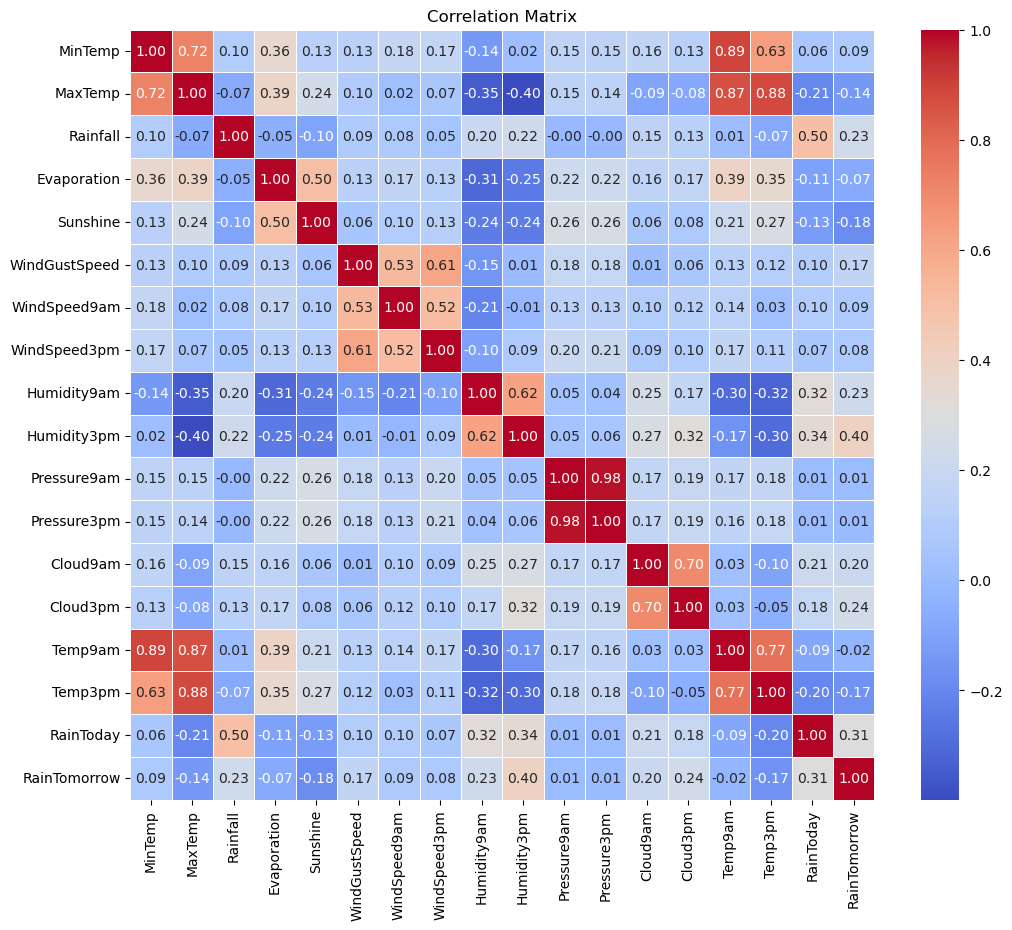

In [6]:
#we create a corellation matrix and display it as a heatmap
correlation_matrix = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [7]:
print(X.head())
print(X.shape)
X_scaled = preprocessing.scale(X.T)
num_components = min(X.shape[0], X.shape[1])  

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          0.0       0.0           44.0   
1      7.4     25.1       0.0          0.0       0.0           44.0   
2     12.9     25.7       0.0          0.0       0.0           46.0   
3      9.2     28.0       0.0          0.0       0.0           24.0   
4     17.5     32.3       1.0          0.0       0.0           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       1007.1       8.0       0.0     16.9     21.8         0

In [9]:
#we aply PCA to reduce the dimensionality
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

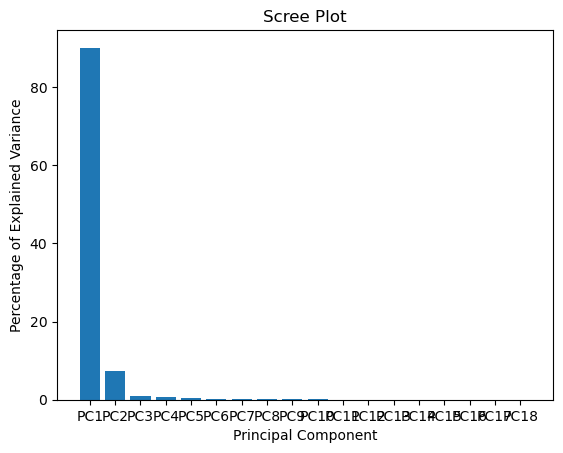

In [10]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

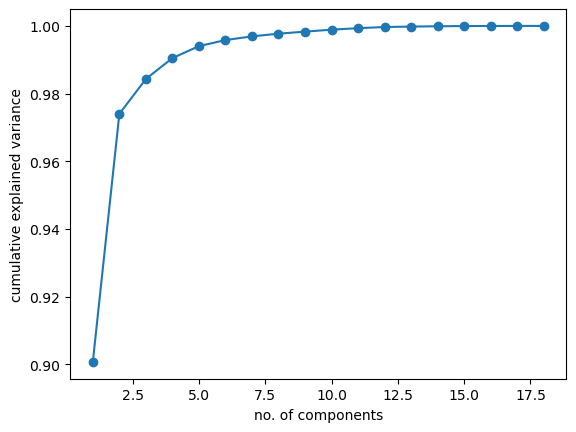

In [11]:
plt.plot(range(1,19),pca.explained_variance_ratio_.cumsum(),marker = 'o')
plt.xlabel("no. of components")
plt.ylabel("cumulative explained variance")
plt.show()

In [12]:
pca1 = PCA(n_components=2)
pca.fit(X_pca)
pca.transform(X_pca)

array([[-1.31815020e+02, -2.86137016e+01, -1.72552758e+01,
        -1.51431762e+01,  1.42032372e+01, -2.75913426e-01,
         8.02683213e-03, -3.95168286e+00, -1.00783562e+01,
         1.15025715e+00,  2.27135948e+01,  5.33925436e+00,
        -1.11542205e+01,  5.31493440e-01,  2.60685779e-01,
         1.81357689e-01, -4.95010485e-02,  8.18819046e-16],
       [-1.24069264e+02,  4.02402833e+01, -5.53834120e+00,
        -4.61814796e+01,  4.87439990e+01, -5.58095078e-01,
        -4.30447185e+00, -1.73630454e+01,  2.34446531e+01,
         5.87012128e+00, -3.02571884e+00, -2.60331492e+00,
        -2.97744616e-01, -6.37979278e-02, -5.14901535e-02,
         7.24195217e-02,  4.23383435e-02, -1.32015315e-15],
       [-1.40249336e+02, -7.38646247e+01, -1.71623818e+01,
         1.11411802e+01, -1.52280714e+01,  8.81410141e-02,
        -7.83829203e+00, -1.16283581e+01, -8.86113391e+00,
         2.53698189e+01, -1.05121542e+01,  1.33298230e+01,
         8.56200159e-01,  3.43849521e-03, -5.53457787e

In [13]:

#function to perform kmeans clustering
def kmeans(data, k, nstart):
    np.random.seed(0)
    centers = data[np.random.choice(range(len(data)), k, replace=False)]
    for _ in range(nstart):
        distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centers = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        if np.all(centers == new_centers):
            break
        centers = new_centers

    wcss = 0
    for i in range(k):
        cluster_points = data[labels == i]
        wcss += np.sum(np.linalg.norm(cluster_points - centers[i], axis=1)**2)
    
    return labels, wcss

In [14]:
def plot_wcss(data, max_k, nstart):
    wcss_values = []
    
    for k in range(1, max_k + 1):
        _, wcss = kmeans(data, k, nstart)
        wcss_values.append(wcss)
    
    # Plotting the Elbow Method
    plt.plot(range(1, max_k + 1), wcss_values, marker='o')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.show()

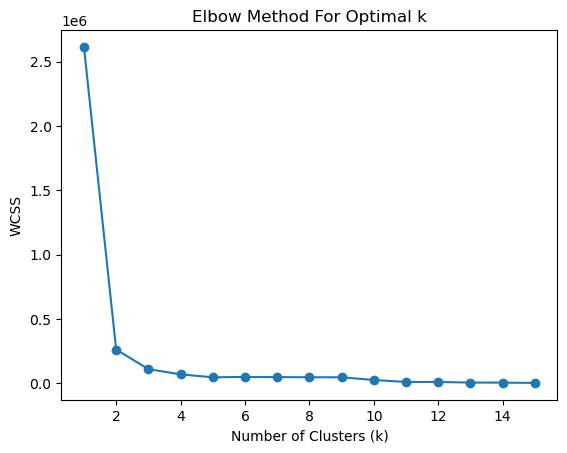

In [15]:
plot_wcss(pca.transform(X_pca),15,19)

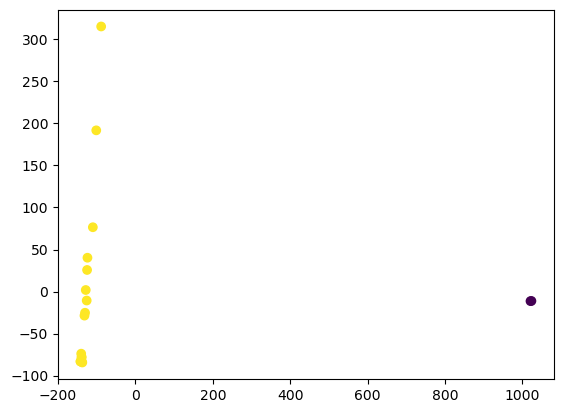

The Within-Cluster Sum of Square is 263013.2045699645


In [16]:

c1,wcss1 = kmeans(pca.transform(X_pca),2,19)
plt.scatter(pca.transform(X_pca)[:, 0], pca.transform(X_pca)[:, 1], c=c1)
plt.show()
print("The Within-Cluster Sum of Square is",wcss1)
